# Load Data

In [ ]:
!pip install --upgrade fsspec
!pip install datasets # Install the 'datasets' library

from datasets import load_dataset # Now you can import the library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Load dataset
ds = load_dataset("Bilal-Mamji/Medical-summary")
ds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/567 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/615k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/250 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 9250
    })
    validation: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 500
    })
    test: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 250
    })
})

# Instructions

In [ ]:
from collections import Counter

for split in ds:
  instructions = [subject['instruction'] for subject in ds[split]]
  instruction_counts = Counter(instructions)
  print(split + " COUNTS:")
  for instruction, count in instruction_counts.items():
        print(f"- {count}: {instruction}")

train COUNTS:
- 6526: Create a Medical SOAP note summary from the dialogue, following these guidelines:
    S (Subjective): Summarize the patient's reported symptoms, including chief complaint and relevant history. Rely on the patient's statements as the primary source and ensure standardized terminology.
    O (Objective): Highlight critical findings such as vital signs, lab results, and imaging, emphasizing important details like the side of the body affected and specific dosages. Include normal ranges where relevant.
    A (Assessment): Offer a concise assessment combining subjective and objective data. State the primary diagnosis and any differential diagnoses, noting potential complications and the prognostic outlook.
    P (Plan): Outline the management plan, covering medication, diet, consultations, and education. Ensure to mention necessary referrals to other specialties and address compliance challenges.
    Considerations: Compile the report based solely on the transcript pro

All instructions are essentially the same, which is asking for SOAP. Some instructions clarify what is meant by SOAP. All test instructions do not further clarify.

# Input Length

In [ ]:
# Get all input lengths
ds

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 9250
    })
    validation: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 500
    })
    test: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 250
    })
})

Plotting the range of all input lengths across all data splits. I am running this analysis on all splits because we did not create the splits ourselves. This gives us visibility into data quality, without peering too deep into test data.

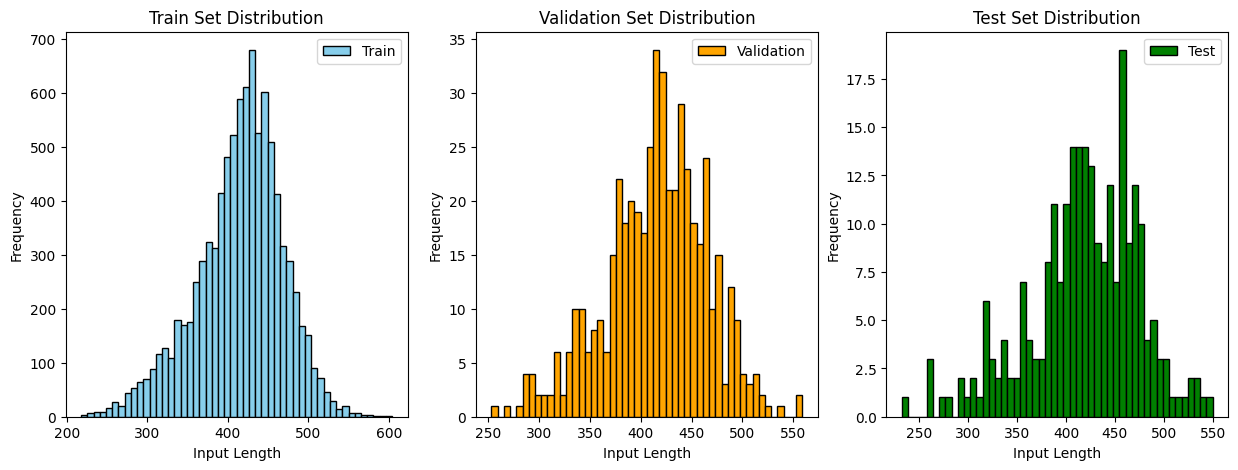

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_lengths = [len(example['input'].split()) for example in ds['train']]
validation_lengths = [len(example['input'].split()) for example in ds['validation']]
test_lengths = [len(example['input'].split()) for example in ds['test']]


# Configure the plot layout for three histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms on each subplot
ax1.hist(train_lengths, bins=50, color='skyblue', edgecolor='black', label='Train')
ax1.set_xlabel('Input Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Train Set Distribution')
ax1.legend()

ax2.hist(validation_lengths, bins=50, color='orange', edgecolor='black', label='Validation')
ax2.set_xlabel('Input Length')
ax2.set_ylabel('Frequency')
ax2.set_title('Validation Set Distribution')
ax2.legend()

ax3.hist(test_lengths, bins=50, color='green', edgecolor='black', label='Test')
ax3.set_xlabel('Input Length')
ax3.set_ylabel('Frequency')
ax3.set_title('Test Set Distribution')
ax3.legend()

plt.show()

Repeat for output (summary) lengths

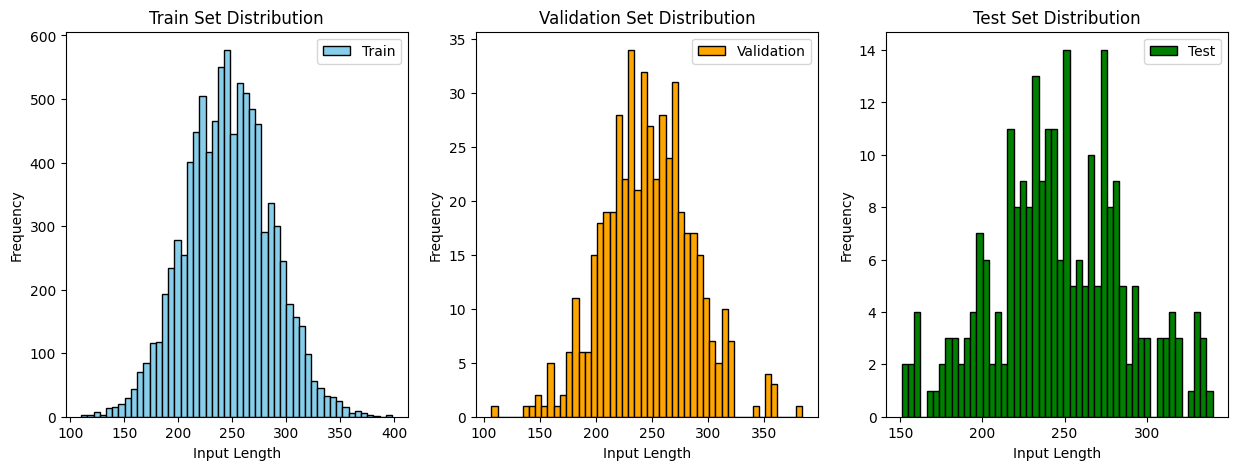

In [ ]:
train_lengths = [len(example['output'].split()) for example in ds['train']]
validation_lengths = [len(example['output'].split()) for example in ds['validation']]
test_lengths = [len(example['output'].split()) for example in ds['test']]


# Configure the plot layout for three histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms on each subplot
ax1.hist(train_lengths, bins=50, color='skyblue', edgecolor='black', label='Train')
ax1.set_xlabel('Input Length')
ax1.set_ylabel('Frequency')
ax1.set_title('Train Set Distribution')
ax1.legend()

ax2.hist(validation_lengths, bins=50, color='orange', edgecolor='black', label='Validation')
ax2.set_xlabel('Input Length')
ax2.set_ylabel('Frequency')
ax2.set_title('Validation Set Distribution')
ax2.legend()

ax3.hist(test_lengths, bins=50, color='green', edgecolor='black', label='Test')
ax3.set_xlabel('Input Length')
ax3.set_ylabel('Frequency')
ax3.set_title('Test Set Distribution')
ax3.legend()

plt.show()